In [9]:
# load google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
from collections import Counter
import itertools
import matplotlib.pyplot as plt

In [11]:
# File paths for the datasets
train_file_path = '/content/drive/MyDrive/binary/train.csv'
dev_file_path = '/content/drive/MyDrive/binary/dev.csv'
test_file_path = '/content/drive/MyDrive/binary/test.csv'

In [12]:
# load dataset, analyze token frequencies, and visualize the results
def load_analyze_and_visualize_dataset(file_path, dataset_name):
    # Load dataset
    data = pd.read_csv(file_path)

    # Tokenize and calculate frequencies
    tokens = data['text'].str.split()
    token_counts = Counter(itertools.chain.from_iterable(tokens))
    token_freq_df = pd.DataFrame(token_counts.items(), columns=['Token', 'Frequency']).sort_values(by='Frequency', ascending=False).reset_index(drop=True)

    # Visualization
    plt.figure(figsize=(10, 6))
    token_freq_df.head(10).plot(kind='bar', x='Token', y='Frequency', legend=False)
    plt.title(f'Top 10 Token Frequencies in {dataset_name} Dataset')
    plt.xlabel('Token')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

    return token_freq_df




<Figure size 1000x600 with 0 Axes>

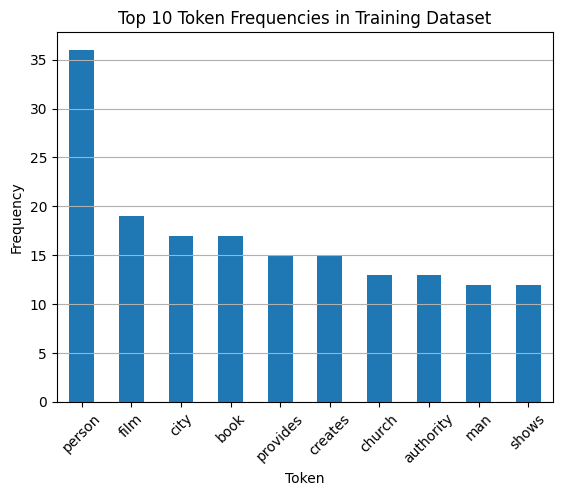

<Figure size 1000x600 with 0 Axes>

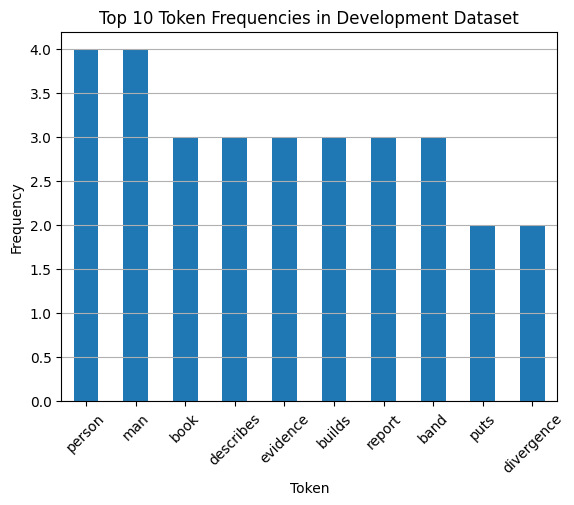

<Figure size 1000x600 with 0 Axes>

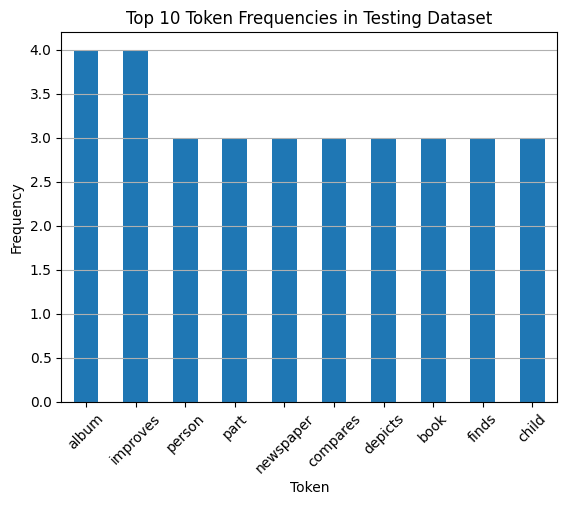

In [13]:
# Visualizing each dataset
train_token_freq = load_analyze_and_visualize_dataset(train_file_path, "Training")
dev_token_freq = load_analyze_and_visualize_dataset(dev_file_path, "Development")
test_token_freq = load_analyze_and_visualize_dataset(test_file_path, "Testing")


In [14]:
# file paths
train_data = pd.read_csv(train_file_path)
dev_data = pd.read_csv(dev_file_path)
test_data = pd.read_csv(test_file_path)

In [16]:
# Remap the 'original_label' to 0 and 1 and calculate inconsistencies
def remap_labels_and_calculate_inconsistencies(dataset):
    remapped_labels = {'implausible': '0', 'plausible': '1'}
    dataset['remapped_original_label'] = dataset['original_label'].map(remapped_labels)
    inconsistencies = (dataset['remapped_original_label'] != dataset['label'].astype(str)).sum()
    total_entries = len(dataset)
    inconsistency_ratio = inconsistencies / total_entries
    return inconsistencies, total_entries, inconsistency_ratio

# Calculate for each dataset
train_inconsistencies, train_total, train_ratio = remap_labels_and_calculate_inconsistencies(train_data)
dev_inconsistencies, dev_total, dev_ratio = remap_labels_and_calculate_inconsistencies(dev_data)
test_inconsistencies, test_total, test_ratio = remap_labels_and_calculate_inconsistencies(test_data)

# Summarize the results
summary = pd.DataFrame({
    'Dataset': ['Training', 'Development', 'Testing'],
    'Total Entries': [train_total, dev_total, test_total],
    'Inconsistencies': [train_inconsistencies, dev_inconsistencies, test_inconsistencies],
    'Inconsistency Ratio': [train_ratio, dev_ratio, test_ratio]
})



In [17]:
# Output the summary
print(summary)

       Dataset  Total Entries  Inconsistencies  Inconsistency Ratio
0     Training           1386              477             0.344156
1  Development            173               57             0.329480
2      Testing            174               57             0.327586
